<a href="https://colab.research.google.com/github/wnsmir/DSBA5/blob/main/Day5%E1%84%91%E1%85%A1%E1%86%AB%E1%84%83%E1%85%A1%E1%84%89%E1%85%B3%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A5%E1%84%87%E1%85%AE%E1%86%AB%E1%84%89%E1%85%A5%E1%86%A8_06%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A5%E1%84%91%E1%85%B3%E1%84%85%E1%85%A6%E1%84%8B%E1%85%B5%E1%86%B7%E1%84%8B%E1%85%B4%E1%84%83%E1%85%A1%E1%84%8B%E1%85%A3%E1%86%BC%E1%84%92%E1%85%A1%E1%86%AB%E1%84%8B%E1%85%B3%E1%86%BC%E1%84%8B%E1%85%AD%E1%86%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

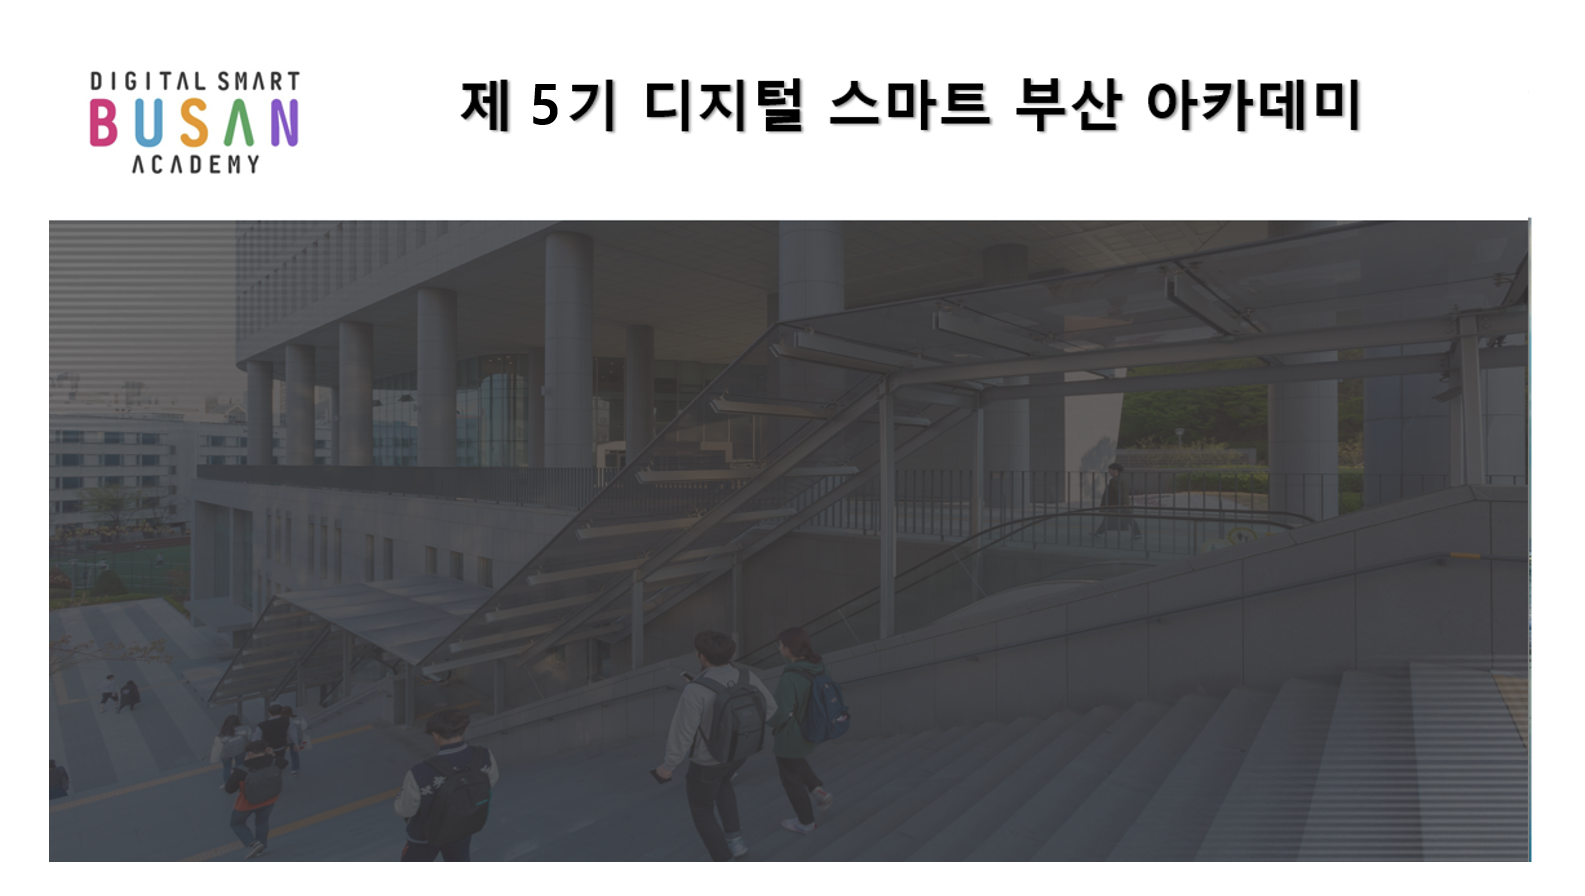

# **06 데이터프레임의 다양한 응용**

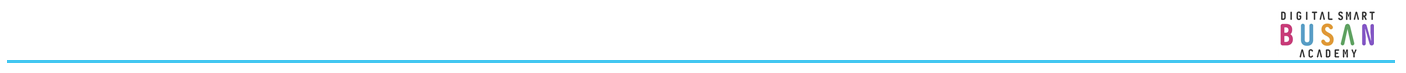

# 1. 함수 매핑
## 1-1 개별 원소에 함수 매핑

### 1. 시리즈 원소에 함수 매핑
* 시리즈 객체에 apply() 메소드를 적용하면 인자로 전달하는 매핑 함수에 시리즈의 모든 원소를 하나씩 입력하고 함수의 리턴 값을 돌려받음

```
시리즈 원소에 함수 매핑: Series 객체. apply(매핑함수)
```

* titanic 데이터셋에서 2개 열('age', 'fare') 을 선택하고, 숫자 10만을 원소 값으로 갖는 새로운 열('ten')을 추가



In [ ]:
# <예제 6-1> 시리즈의 원소에 apply() 적용
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋에서 age, fare 2개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','fare']]
df['ten'] = 10
print(df.head())

    age     fare  ten
0  22.0   7.2500   10
1  38.0  71.2833   10
2  26.0   7.9250   10
3  35.0  53.1000   10
4  35.0   8.0500   10


* 사용자 함수를 정의
  * 임의의 객체 n에 숫자 10을 더하는 add_10(n) 함수
  * 객체 a와 b를 더하는 add_two_obj(a, b)함수

In [ ]:
# 사용자 함수 정의
def add_10(n):   # 10을 더하는 함수
    return n + 10

def add_two_obj(a, b):    # 두 객체의 합
    return a + b

print(add_10(10))
print(add_two_obj(10, 10))

20
20


* apply() 메소드를 이용하여 df['age'] 열에 add_10 함수를 매칭하면 모든 원소에 숫자 10을 더하여 sr1에 저장
* add_two_obj 함수를 df['age'] 열에 매핑하면 함께 전달된 숫자 10을 모든 원소에 더하여 sr2에 저장
* lambda 함수를 df['age'] 열에 매핑하여 add_10 함수의 리턴값을 sr3에 저장





In [ ]:
# 시리즈 객체에 적용
sr1 = df['age'].apply(add_10)               # n = df['age']의 모든 원소
print(sr1.head())
print('\n')

# 시리즈 객체와 숫자에 적용 : 2개의 인수(시리즈 + 숫자)
sr2 = df['age'].apply(add_two_obj, b=10)    # a=df['age']의 모든 원소, b=10
print(sr2.head())
print('\n')

# 람다 함수 활용: 시리즈 객체에 적용
sr3 = df['age'].apply(lambda x: add_10(x))  # x=df['age']
print(sr3.head())

0    32.0
1    48.0
2    36.0
3    45.0
4    45.0
Name: age, dtype: float64


0    32.0
1    48.0
2    36.0
3    45.0
4    45.0
Name: age, dtype: float64


0    32.0
1    48.0
2    36.0
3    45.0
4    45.0
Name: age, dtype: float64


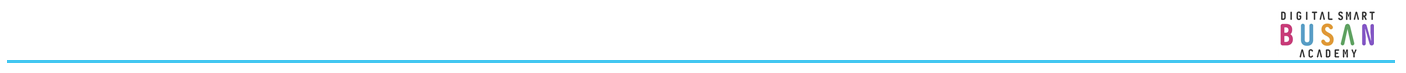

### 2. 데이터프레임 원소에 함수 매핑
* 데이터프레임의 개별 원소에 특정 함수를 매핑하려면 applymap() 메소드를 적용

```
데이터프레임 원소에 함수 매핑: DataFrame 객체. applymap(매핑함수)
```

* 'titanic' 데이터셋에서 숫자 데이터로 구성된 2개의 열('age','fare')을 선택하여 만든 데이터프레임 df 만듬
  * 인수 n을 입력 받아 숫자 10을 더한 결과를 반환하는 add_10(n) 함수 사용
  * applymap() 메소드를 이용하여 add_10(n) 함수를 df에 적용

In [ ]:
# <예제 6-2> 데이터프레임 원소에 applymap() 적용
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋에서 age, fare 2개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','fare']]
print(df.head())
print('\n')

# 사용자 함수 정의
def add_10(n):   # 10을 더하는 함수
    return n + 10

# 데이터프레임에 applymap()으로 add_10() 함수를 매핑 적용
df_map = df.applymap(add_10)
print(df_map.head())

    age     fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500


    age     fare
0  32.0  17.2500
1  48.0  81.2833
2  36.0  17.9250
3  45.0  63.1000
4  45.0  18.0500


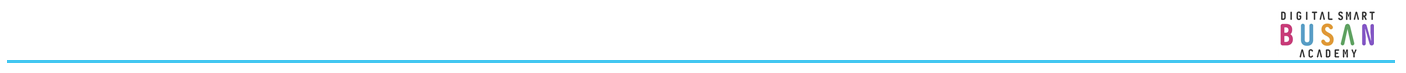

## 1-2 시리즈 객체에 함수 매핑

### 1. 데이터프레임의 각 열에 함수 매핑
* 데이터프레임의 apply(axis=0) 메소드를 적용하면 모든 열을 하나씩 분리하여 매핑 함수의 인자로 각 열(시리즈)이 전달된다.

```
데이터프레임의 열에 함수 매핑: DataFrame 객체. apply(매핑함수, axis=0)
```

* 참고로 missing_value(series) 함수를 정의할 때 활용한 isnull() 메소드는 시리즈 객체에서 누락 데이터를 찾고 그 결과를 불린 시리즈 형태로 반환하는 함수


In [ ]:
# <예제 6-3> 데이터프레임에 apply(axis=0) 적용
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋에서 age, fare 2개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','fare']]
print(df.head())
print('\n')

# 사용자 함수 정의
def missing_value(series):    # 시리즈를 인수로 전달
    return series.isnull()    # 불린 시리즈를 반환

# 데이터프레임의 각 열을 인수로 전달하면 데이터프레임을 반환
result = df.apply(missing_value, axis=0)
print(result.head())
print('\n')
print(type(result))

    age     fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500


     age   fare
0  False  False
1  False  False
2  False  False
3  False  False
4  False  False


<class 'pandas.core.frame.DataFrame'>


* 시리즈의 최댓값과 최솟값의 차이를 계산하여 반환하는 min_max(x) 함수를 정의해서 사용

In [ ]:
# <예제 6-4> 데이터프레임에 apply(axis=0) 적용
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋에서 age, fare 2개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','fare']]
print(df.head())
print('\n')

# 사용자 함수 정의
def min_max(x):    # 최대값 - 최소값
    return x.max() - x.min()

# 데이터프레임의 각 열을 인수로 전달하면 시리즈를 반환
result = df.apply(min_max)   #기본값 axis=0
print(result)
print('\n')
print(type(result))

    age     fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500


age      79.5800
fare    512.3292
dtype: float64


<class 'pandas.core.series.Series'>


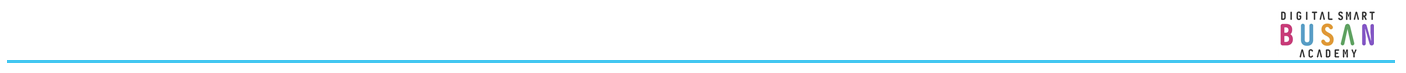

### 2. 데이터프레임의 각 행에 함수 매핑
* 데이터프레임 객체에 apply(axis=1) 메소드를 적용하면 데이터프레임의 각 행을 매핑 함수의 인자로 전달

```
데이터프레임의 행에 함수 매핑: DataFrame 객체. apply(매핑함수, axis=1)
```

In [ ]:
# 데이터프레임에 apply() 적용
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋에서 age, fare 2개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','fare']]
df['ten'] = 10
print(df.head())
print('\n')

# 사용자 함수 정의
def add_two_obj(a, b):    # 두 객체의 합
    return a + b

# 데이터프레임의 2개 열을 선택하여 적용
# x=df, a=df['age'], b=df['ten']
df['add'] = df.apply(lambda x: add_two_obj(x['age'], x['ten']), axis=1)
print(df.head())

    age     fare  ten
0  22.0   7.2500   10
1  38.0  71.2833   10
2  26.0   7.9250   10
3  35.0  53.1000   10
4  35.0   8.0500   10


    age     fare  ten   add
0  22.0   7.2500   10  32.0
1  38.0  71.2833   10  48.0
2  26.0   7.9250   10  36.0
3  35.0  53.1000   10  45.0
4  35.0   8.0500   10  45.0


* 각행에서 'age' 열의 값과 'ten' 열의 10을 더하여 시리즈 객체를 만들어 새로운 열('add')로 추가한다.

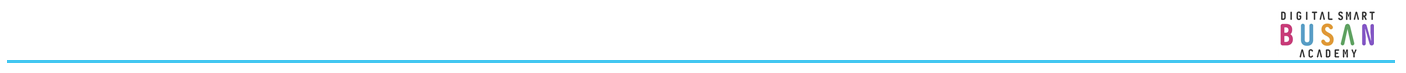

## 1-3 데이터프레임 객체에 함수 매핑
* 데이터프레임 객체를 함수에 매핑하려면 pipe() 메소드를 활용

```
데이터프레임 객체에 함수 매핑: DataFrame 객체. pipe(매핑함수)
```

* 'titanic' 데이터셋에서 숫자 데이터로 구성된 2개의 열('age', 'fare')을 선택하여 데이터프레임 dr을 만들고
* 데이터프레임을 인자로 받아 데이터프레임, 시리즈, 값을 반환하는 3개의 사용자 함수(missing_value(x), missing_count(x), totoal_number_missing(x))를 정의

In [ ]:
# <예제 6-6> 데이터프레임에 pipe() 적용
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋에서 age, fare 2개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','fare']]

# 각 열의 NaN 찾기 - 데이터프레임 전달하면 데이터프레임을 반환
def missing_value(x):
    return x.isnull()

# 각 열의 NaN 개수 반환 - 데이터프레임 전달하면 시리즈 반환
def missing_count(x):    #
    return missing_value(x).sum()

# 데이터프레임의 총 NaN 개수 - 데이터프레임 전달하면 값을 반환
def totoal_number_missing(x):
    return missing_count(x).sum()

* missing_value(x) 함수는 데이터 프레임을 입력으로 받으면 isnull() 메소드를 이용하여 누락 데이터(NaN)여부를 True, False로 표시

In [ ]:
# 데이터프레임에 pipe() 메소드로 함수 매핑
result_df = df.pipe(missing_value)
print(result_df.head())
print(type(result_df))

     age   fare
0  False  False
1  False  False
2  False  False
3  False  False
4  False  False
<class 'pandas.core.frame.DataFrame'>


* missing_count(x) 함수는 데이터프레임을 입력받으면 각 열의 누락 데이터 개수를 시리즈 형태로 반환

In [ ]:
result_series = df.pipe(missing_count)
print(result_series)
print(type(result_series))

age     177
fare      0
dtype: int64
<class 'pandas.core.series.Series'>


* totoal_number_missing(x) 함수는 데이터프레임을 입력받으면 각 열의 누락 데이터(NaN)의 개수를 합산하여 반환

In [ ]:
result_value = df.pipe(totoal_number_missing)
print(result_value)
print(type(result_value))

177
<class 'numpy.int64'>


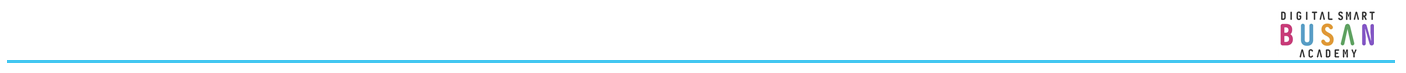

# 2. 열 재구성

## 2-1 열 순서 변경

```
데이터프레임의 열 순서 변경: DataFrame 객체[재구성한 열 이름의 리스트]
```

* 'titanic' 데이터셋의 일부인(5행X4열)을 선택하여 데이터프레임 df를 출력해서 내용을 확인

In [ ]:
# <예제 6-7> 열 순서 바꾸기
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋의 부분을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[0:4, 'survived':'age']
print(df, '\n')

   survived  pclass     sex   age
0         0       3    male  22.0
1         1       1  female  38.0
2         1       3  female  26.0
3         1       1  female  35.0
4         0       3    male  35.0 



* 데이터프레임의 열 이름 배열(df.columns.values)을 선택하여 파이썬 list() 함수에 전달하여 열 이름의 리스트(columns) 만들기

In [ ]:
# 열 이름의 리스트 만들기
columns = list(df.columns.values)   #기존 열 이름
print(columns, '\n')

['survived', 'pclass', 'sex', 'age'] 



* sorted() 함수에 columns 변수를 입력하면 열 이름이 알파벳 순으로 정렬

In [ ]:
# 열 이름을 알파벳 순으로 정렬하기
columns_sorted = sorted(columns)    #알파벳 순으로 정렬
df_sorted = df[columns_sorted]
print(df_sorted, '\n')

    age  pclass     sex  survived
0  22.0       3    male         0
1  38.0       1  female         1
2  26.0       3  female         1
3  35.0       1  female         1
4  35.0       3    male         0 



* reversed() 함수에 columns 변수를 전달하면 기존 순서의 정반대 역순으로 정렬

In [ ]:
# 열 이름을 기존 순서의 정반대 역순으로 정렬하기
columns_reversed = list(reversed(columns))
df_reversed = df[columns_reversed]
print(df_reversed, '\n')

    age     sex  pclass  survived
0  22.0    male       3         0
1  38.0  female       1         1
2  26.0  female       3         1
3  35.0  female       1         1
4  35.0    male       3         0 



* columns_customed와 같이 임의의 순서로 열 이름을 재배치한 상태로 데이터 프레임 df에서 각 열을 순서에 맞춰서 선택할 수 있다.

In [ ]:
# 열 이름을 사용자가 정의한 임의의 순서로 재배치하기
columns_customed = ['pclass', 'sex', 'age', 'survived']
df_customed = df[columns_customed]
print(df_customed)

   pclass     sex   age  survived
0       3    male  22.0         0
1       1  female  38.0         1
2       3  female  26.0         1
3       1  female  35.0         1
4       3    male  35.0         0


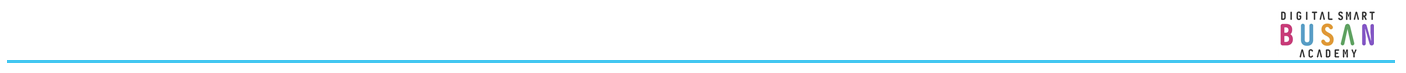

## 2-2 열 분리

* 한국 주식시장에 상장된 모 회사의 날짜별 주가를 정리한 데이터('주가데이터.xlsx')를 사용

In [ ]:
# <예제 6-8> 열 분리하기
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd

# 데이터셋 가져오기
df = pd.read_excel('./주가데이터.xlsx', engine= 'openpyxl')
print(df.head(), '\n')
print(df.dtypes, '\n')

         연월일   당일종가  전일종가     시가     고가     저가     거래량
0 2018-07-02  10100   600  10850  10900  10000  137977
1 2018-06-29  10700   300  10550  10900   9990  170253
2 2018-06-28  10400   500  10900  10950  10150  155769
3 2018-06-27  10900   100  10800  11050  10500  133548
4 2018-06-26  10800   350  10900  11000  10700   63039 

연월일     datetime64[ns]
당일종가             int64
전일종가             int64
시가               int64
고가               int64
저가               int64
거래량              int64
dtype: object 



* astype() 메소드를 사용하여 '연월일' 열의 시간형 데이터를 문자열로 변경
* split() 메소드를 '연월일' 열의 문자열 속성에 적용하면, '연-월-일' 형식의 문자열 데이터를 분리하여 ['연', '월', '일'] 형태의 리스트로 정리

In [ ]:
# 연, 월, 일 데이터 분리하기
df['연월일'] = df['연월일'].astype('str')   # 문자열 메소드 사용을 자료형 변경
dates = df['연월일'].str.split('-')        # 문자열을 split() 메서드로 분리
print(dates.head(), '\n')

0    [2018, 07, 02]
1    [2018, 06, 29]
2    [2018, 06, 28]
3    [2018, 06, 27]
4    [2018, 06, 26]
Name: 연월일, dtype: object 



* dates 변수에 저장된 문자열 리스트의 원소를 선택하기 위해 get() 메소드를 활용
* 각 원소 리스트의 인덱스 0, 1, 2를 전달하여 '연', '월', '일' 데이터를 따로 선택할 수 있음

```
시리즈의 문자를 리스트 인덱싱: Series 객체.str.get(인덱스)
```



In [ ]:
# 분리된 정보를 각각 새로운 열에 담아서 df에 추가하기
df['연'] = dates.str.get(0)     # dates 변수의 원소 리스트의 0번째 인덱스 값
df['월'] = dates.str.get(1)     # dates 변수의 원소 리스트의 1번째 인덱스 값
df['일'] = dates.str.get(2)     # dates 변수의 원소 리스트의 2번째 인덱스 값
print(df.head())

          연월일   당일종가  전일종가     시가     고가     저가     거래량     연   월   일
0  2018-07-02  10100   600  10850  10900  10000  137977  2018  07  02
1  2018-06-29  10700   300  10550  10900   9990  170253  2018  06  29
2  2018-06-28  10400   500  10900  10950  10150  155769  2018  06  28
3  2018-06-27  10900   100  10800  11050  10500  133548  2018  06  27
4  2018-06-26  10800   350  10900  11000  10700   63039  2018  06  26


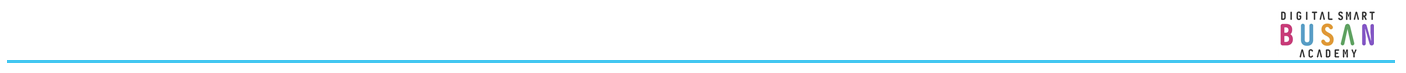

# 3. 필터링
* 시리즈 또는 데이터프레임의 데이터 중에서 특정 조건식을 만족하는 원소만 따로 추출하는 개념
* 가장 대표적인 방법; 불린 인덱싱

## 3-1 불린 인덱싱(boolean indexing)
* 시리즈 객체에 어떤 조건식을 적용하면 각 원소에 대해 참/거짓을 판별하여 불린(참, 거짓) 값으로 구성된 시리즈를 반환

```
데이터프레임의 불린 인덱싱: DataFrame 객체[불린 시리즈]
```

* 'titanic' 데이터셋의 10대(10보다 크거나 같고 0보다 작은 두 조건식을 AND 연산자로 결합)인 승객만 따로 선택

In [ ]:
# <예제 6-9> 불린 인덱싱
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 로딩
titanic = sns.load_dataset('titanic')

# 나이가 10대(10~19세)인 승객만 따로 선택
mask1 = (titanic.age >= 10) & (titanic.age < 20)
df_teenage = titanic.loc[mask1, :]
print(df_teenage.head())
print('\n')

    survived  pclass     sex   age  sibsp  parch      fare embarked   class  \
9          1       2  female  14.0      1      0   30.0708        C  Second   
14         0       3  female  14.0      0      0    7.8542        S   Third   
22         1       3  female  15.0      0      0    8.0292        Q   Third   
27         0       1    male  19.0      3      2  263.0000        S   First   
38         0       3  female  18.0      2      0   18.0000        S   Third   

      who  adult_male deck  embark_town alive  alone  
9   child       False  NaN    Cherbourg   yes  False  
14  child       False  NaN  Southampton    no   True  
22  child       False  NaN   Queenstown   yes   True  
27    man        True    C  Southampton    no  False  
38  woman       False  NaN  Southampton    no  False  




* 서로 다른 두 열('age', 'sex')에 조건식을 적용하여 나이가 10세 미만이고 성별이 여성인 승객들만 따로 선택

In [ ]:
# 나이가 10세 미만(0~9세)이고 여성인 승객만 따로 선택
mask2 = (titanic.age < 10) & (titanic.sex == 'female')
df_female_under10 = titanic.loc[mask2, :]
print(df_female_under10.head())

     survived  pclass     sex  age  sibsp  parch     fare embarked   class  \
10          1       3  female  4.0      1      1  16.7000        S   Third   
24          0       3  female  8.0      3      1  21.0750        S   Third   
43          1       2  female  3.0      1      2  41.5792        C  Second   
58          1       2  female  5.0      1      2  27.7500        S  Second   
119         0       3  female  2.0      4      2  31.2750        S   Third   

       who  adult_male deck  embark_town alive  alone  
10   child       False    G  Southampton   yes  False  
24   child       False  NaN  Southampton    no  False  
43   child       False  NaN    Cherbourg   yes  False  
58   child       False  NaN  Southampton   yes  False  
119  child       False  NaN  Southampton    no  False  


* 두 조건식을 OR(|) 연산자로 결합하여 두 조건 중에서 하나라도 참인 값을 추출할 수 있음_

In [ ]:
# 나이가 10세 미만(0~9세) 또는 60세 이상인 승객의 age, sex, alone 열만 선택
mask3 = (titanic.age < 10) | (titanic.age >= 60)
df_under10_morethan60 = titanic.loc[mask3, ['age', 'sex', 'alone']]
print(df_under10_morethan60.head())

     age     sex  alone
7    2.0    male  False
10   4.0  female  False
16   2.0    male  False
24   8.0  female  False
33  66.0    male   True


## isin() 메소드 활용
* 데이터프레임의 열에 isin() 메소드를 적용하면 특정 값을 가진 행들을 따로 추출

```
isin() 메소드 활용한 필터링: DataFrame의 열 객체.isin(추출 값의 리스트)
```

* 'sibsp' 열에 대한 3개의 다른 조건식을 만들고 OR(|) 조건으로 세 조건식 중에서 하나라도 만족하는 행을 찾음



In [ ]:
# <예제 6-10> isin() 필터
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import seaborn as sns
import pandas as pd

# titanic 데이터셋 로딩
titanic = sns.load_dataset('titanic')

# IPyhton 디스플레이 설정 변경 - 출력할 최대 열의 개수
pd.set_option('display.max_columns', 10)

# 함께 탑승한 형제 또는 배우자의 수가 3, 4, 5인 승객만 따로 추출 - 불린 인덱싱
mask3 = titanic['sibsp'] == 3
mask4 = titanic['sibsp'] == 4
mask5 = titanic['sibsp'] == 5
df_boolean = titanic[mask3 | mask4 | mask5]
print(df_boolean.head())

    survived  pclass     sex   age  sibsp  ...  adult_male  deck  embark_town  \
7          0       3    male   2.0      3  ...       False   NaN  Southampton   
16         0       3    male   2.0      4  ...       False   NaN   Queenstown   
24         0       3  female   8.0      3  ...       False   NaN  Southampton   
27         0       1    male  19.0      3  ...        True     C  Southampton   
50         0       3    male   7.0      4  ...       False   NaN  Southampton   

   alive  alone  
7     no  False  
16    no  False  
24    no  False  
27    no  False  
50    no  False  

[5 rows x 15 columns]


* isin() 메서드 활용하는 필터링
  * 조건을 만족하는 행들만 선택하여 df_isin에 저장

In [ ]:
# isin() 메서드 활용하여 동일한 조건으로 추출
isin_filter = titanic['sibsp'].isin([3, 4, 5])
df_isin = titanic[isin_filter]
print(df_isin.head())

    survived  pclass     sex   age  sibsp  ...  adult_male  deck  embark_town  \
7          0       3    male   2.0      3  ...       False   NaN  Southampton   
16         0       3    male   2.0      4  ...       False   NaN   Queenstown   
24         0       3  female   8.0      3  ...       False   NaN  Southampton   
27         0       1    male  19.0      3  ...        True     C  Southampton   
50         0       3    male   7.0      4  ...       False   NaN  Southampton   

   alive  alone  
7     no  False  
16    no  False  
24    no  False  
27    no  False  
50    no  False  

[5 rows x 15 columns]


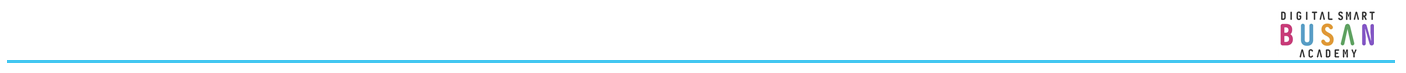

# 4. 데이터프레임 합치기
* 판다스에서 데이터프레임을 합치거나 연결할 때 사용하는 대표적 함수와 메소드: concat(), merge(), join() 등

## 4-1 데이터프레임 연결
* 기존 데이터프레임의 형태를 유지하면서 이어 붙이는 개념으로 판다스 concat() 함수 활용

```
데이터프레임 연결: pandas.concat(데이터프레임의 리스트)
```

* [그림] 데이터프레임 연결(axis=0): 위 아래 행방향으로 연결(기본 옵션(axis=0))


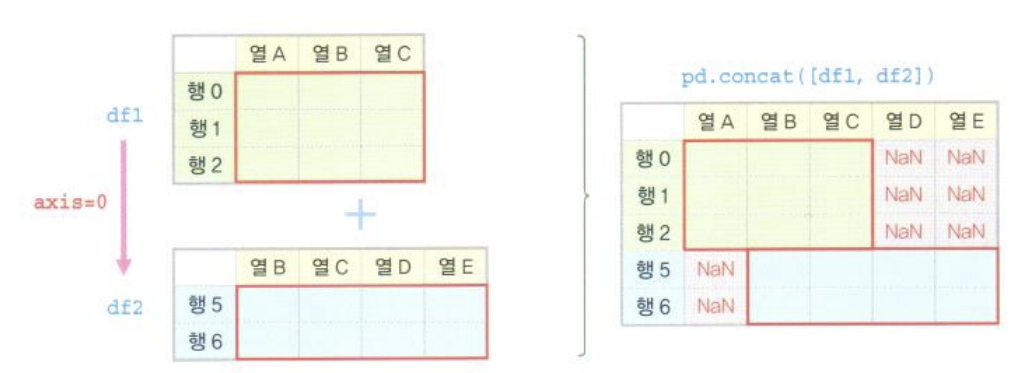


* join='outer' 옵션이 기본값으로 설정
  * 각 데이터프레임의 행 인데스들의 합집합(0, 1, 2, 3, 4, 5)이 기준



In [ ]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd

# 데이터프레임 만들기
df1 = pd.DataFrame({'a': ['a0', 'a1', 'a2', 'a3'],
                    'b': ['b0', 'b1', 'b2', 'b3'],
                    'c': ['c0', 'c1', 'c2', 'c3']},
                    index=[0, 1, 2, 3])

df2 = pd.DataFrame({'a': ['a2', 'a3', 'a4', 'a5'],
                    'b': ['b2', 'b3', 'b4', 'b5'],
                    'c': ['c2', 'c3', 'c4', 'c5'],
                    'd': ['d2', 'd3', 'd4', 'd5']},
                    index=[2, 3, 4, 5])

print(df1, '\n')
print(df2, '\n')

# 2개의 데이터프레임을 위 아래 행 방향으로 이어 붙이듯 연결하기
result1 = pd.concat([df1, df2])
print(result1, '\n')

    a   b   c
0  a0  b0  c0
1  a1  b1  c1
2  a2  b2  c2
3  a3  b3  c3 

    a   b   c   d
2  a2  b2  c2  d2
3  a3  b3  c3  d3
4  a4  b4  c4  d4
5  a5  b5  c5  d5 

    a   b   c    d
0  a0  b0  c0  NaN
1  a1  b1  c1  NaN
2  a2  b2  c2  NaN
3  a3  b3  c3  NaN
2  a2  b2  c2   d2
3  a3  b3  c3   d3
4  a4  b4  c4   d4
5  a5  b5  c5   d5 



* df1에서 유래한 0, 1, 2, 3행에는 'd' 열이 없기 때문에 NaN으로 입력된다.

* ignore_index=True 옵션은 기존 행 인덱스를 무시하고 새로운 행 인덱스를 설정

In [ ]:
# ignore_index=True 옵션 설정하기
result2 = pd.concat([df1, df2], ignore_index=True)
print(result2, '\n')

    a   b   c    d
0  a0  b0  c0  NaN
1  a1  b1  c1  NaN
2  a2  b2  c2  NaN
3  a3  b3  c3  NaN
4  a2  b2  c2   d2
5  a3  b3  c3   d3
6  a4  b4  c4   d4
7  a5  b5  c5   d5 



* [그림] 데이터프레임 연결(axis=1): 데이터프레임을 좌우 열 방향으로 연결

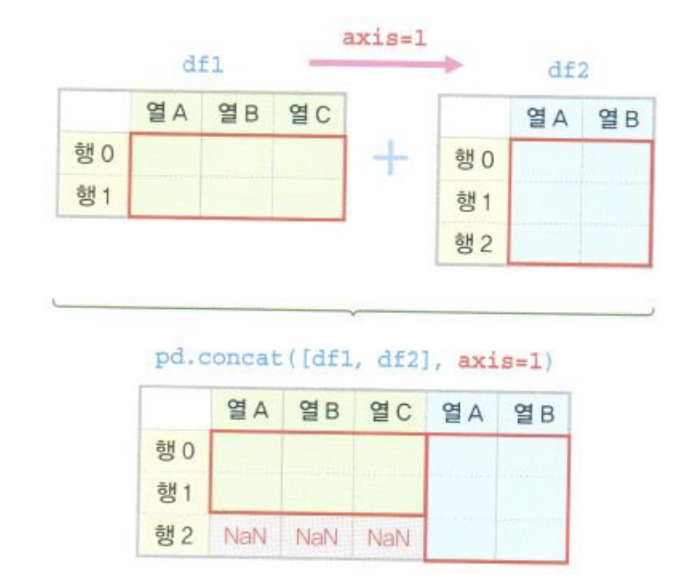

* join='outer' 옵션이 기본값으로 설정
  * 각 데이터프레임의 행 인데스들의 합집합(0, 1, 2, 3, 4, 5)이 기준



In [ ]:
# 2개의 데이터프레임을 좌우 열 방향으로 이어 붙이듯 연결하기
result3 = pd.concat([df1, df2], axis=1)
print(result3, '\n')

     a    b    c    a    b    c    d
0   a0   b0   c0  NaN  NaN  NaN  NaN
1   a1   b1   c1  NaN  NaN  NaN  NaN
2   a2   b2   c2   a2   b2   c2   d2
3   a3   b3   c3   a3   b3   c3   d3
4  NaN  NaN  NaN   a4   b4   c4   d4
5  NaN  NaN  NaN   a5   b5   c5   d5 



* join='inner' 옵션을 설정하면 연결할 데이터프레임들의 행 인덱스의 교집합을 기준으로 사용
  * df1과 df2에 적용하면 양쪽에 공통으로 존재하는 2~3행의 데이터만을 반환

In [ ]:
# join='inner' 옵션 적용하기(교집합)
result3_in = pd.concat([df1, df2], axis=1, join='inner')
print(result3_in, '\n')

    a   b   c   a   b   c   d
2  a2  b2  c2  a2  b2  c2  d2
3  a3  b3  c3  a3  b3  c3  d3 



* 데이터프레임과 시리즈를 좌우 열 방향으로 연결 --> 데이터프레임에 열을 추가하는 것과 같다.
  * 데이터프레임의 행 인덱스와 시리즈으 인덱스가 같아야 한다.
  * 공통 인덱스가 없을 경우 NaN으로 처리

In [ ]:
# 시리즈 만들기
sr1 = pd.Series(['e0', 'e1', 'e2', 'e3'], name='e')
sr2 = pd.Series(['f0', 'f1', 'f2'], name='f', index=[3, 4, 5])
sr3 = pd.Series(['g0', 'g1', 'g2', 'g3'], name='g')

# df1과 sr1을 좌우 열 방향으로 연결하기
result4 = pd.concat([df1, sr1], axis=1)
print(result4, '\n')

# df2과 sr2을 좌우 열 방향으로 연결하기
result5 = pd.concat([df2, sr2], axis=1, sort=True)
print(result5, '\n')

    a   b   c   e
0  a0  b0  c0  e0
1  a1  b1  c1  e1
2  a2  b2  c2  e2
3  a3  b3  c3  e3 

    a   b   c   d    f
2  a2  b2  c2  d2  NaN
3  a3  b3  c3  d3   f0
4  a4  b4  c4  d4   f1
5  a5  b5  c5  d5   f2 



* 시리즈들로 만든 리스트를 concat() 함수에 전달하면 시리즈가 서로 연결
  * axis=1 옵션: 좌우 열 방향으로 연결
  * axis=0 옵션: 위 아래 행 방향으로 연결

In [ ]:
# sr1과 sr3을 좌우 열 방향으로 연결하기
result6 = pd.concat([sr1, sr3], axis=1)
print(result6, '\n')

result7 = pd.concat([sr1, sr3], axis=0)
print(result7, '\n')

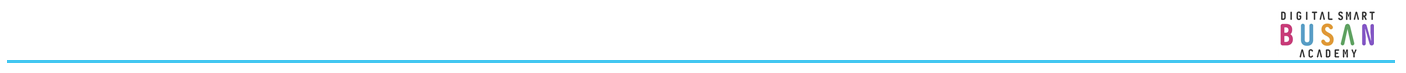

## 4-2 데이터프레임 병합
* merge() 함수는 SQL의 join 명령과 비슷한 방식으로 어떤 기준에 의해 두 데이터프레임을 병합하는 걔념
  * 기준이 되는 열이나 인덱스를 키(key)라고 부름
  * 키가 되는 열이나 인덱스는 반드시 양쪽 데이터프레임에 모두 존재

```
데이터프레임 병합: pandas.merge(df_left, df_right, how='inner', on=None)
```

* [그림] 데이터프레임 합치기(merge)

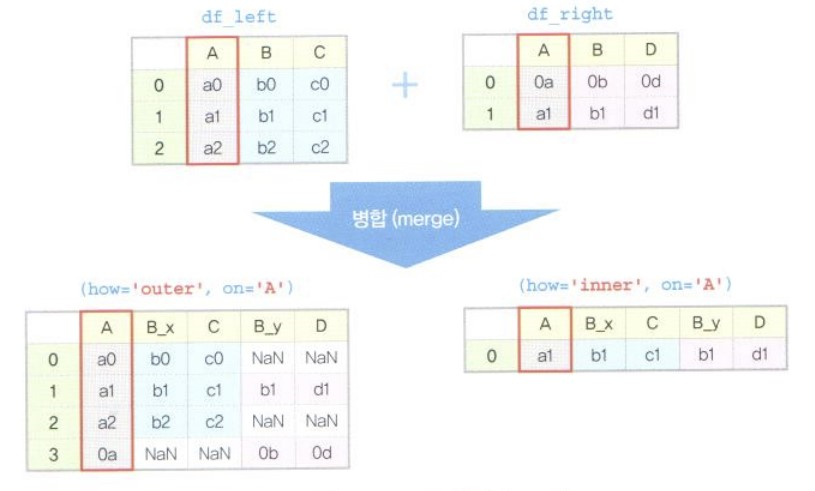

* df1(stock price.xlsx)은 종목코드(id), 회사명(stock_name), 시가총액(value), 주가(price) 열로 구성
* df2(stock valuation.xlsx)은 종목코드(id), 회사명(stock_name), 주당순이익(eps), 주당순자산가치(bps), 주가수익비율(per), 주가자산비율(pbr) 등 주식가치를 평가하는 지표들로 구성



In [ ]:
# <예제 6-12> 데이터프레임 합이기(merge)
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd

# IPyhton 디스플레이 설정 변경
pd.set_option('display.max_columns', 10)                  # 출력할 최대 열의 개수
pd.set_option('display.max_colwidth', 20)                 # 출력할 열의 너비
pd.set_option('display.unicode.east_asian_width', True)   # 유니코드 사용 너비 조정

# 주식 데이터를 가져와서 데이터프레임 만들기
df1 = pd.read_excel('./stock price.xlsx', engine= 'openpyxl')
df2 = pd.read_excel('./stock valuation.xlsx', engine= 'openpyxl')

print(df1)
print('\n')
print(df2)
print('\n')

       id    stock_name          value   price
0  128940      한미약품   59385.666667  421000
1  130960        CJ E&M   58540.666667   98900
2  138250    엔에스쇼핑   14558.666667   13200
3  139480        이마트  239230.833333  254500
4  142280  녹십자엠에스     468.833333   10200
5  145990        삼양사   82750.000000   82000
6  185750        종근당   40293.666667  100500
7  192400    쿠쿠홀딩스  179204.666667  177500
8  199800          툴젠   -2514.333333  115400
9  204210  모두투어리츠    3093.333333    3475


       id              name           eps     bps        per       pbr
0  130960            CJ E&M   6301.333333   54068  15.695091  1.829178
1  136480              하림    274.166667    3551  11.489362  0.887074
2  138040    메리츠금융지주   2122.333333   14894   6.313806  0.899691
3  139480            이마트  18268.166667  295780  13.931338  0.860437
4  145990            삼양사   5741.000000  108090  14.283226  0.758627
5  161390        한국타이어   5648.500000   51341   7.453306  0.820007
6  181710   NHN엔터테인먼트   2110.166667   784

* 병합하려는 두 데이터 프레임을 merge() 함수에 전달
  * on='None' 옵션: 두 데이터프레임에 공통으로 속하는 모든 열을 기준(키)으로 병합
  * how='inner' 옵션: 기준이 되는 열의 데이터가 양쪽 데이터프레임에 공통으로 존재하는 교집합일 경우에만 추출

In [ ]:
# 데이터프레임 합치기 - 교집합
merge_inner = pd.merge(df1, df2)
print(merge_inner)

       id    stock_name          value   price          name           eps  \
0  130960        CJ E&M   58540.666667   98900        CJ E&M   6301.333333   
1  139480        이마트  239230.833333  254500        이마트  18268.166667   
2  145990        삼양사   82750.000000   82000        삼양사   5741.000000   
3  185750        종근당   40293.666667  100500        종근당   3990.333333   
4  204210  모두투어리츠    3093.333333    3475  모두투어리츠     85.166667   

      bps        per       pbr  
0   54068  15.695091  1.829178  
1  295780  13.931338  0.860437  
2  108090  14.283226  0.758627  
3   40684  25.185866  2.470259  
4    5335  40.802348  0.651359  


* on='id' 옵션과 how='outer'옵션을 설정
  * on='id' 옵션: 두 데이터프레임의 공통 열 중에서 'id' 열을 키로 병합
  * how='outer'옵션: 기준이 되는 'id' 열의 데이터가 데이터프레임 중 어느 한쪽에만 속하더라도 포함한다는 뜻

In [ ]:
# 데이터프레임 합치기 - 합집합
merge_outer = pd.merge(df1, df2, how='outer', on='id')
print(merge_outer)

        id    stock_name          value     price              name  \
0   128940      한미약품   59385.666667  421000.0               NaN   
1   130960        CJ E&M   58540.666667   98900.0            CJ E&M   
2   138250    엔에스쇼핑   14558.666667   13200.0               NaN   
3   139480        이마트  239230.833333  254500.0            이마트   
4   142280  녹십자엠에스     468.833333   10200.0               NaN   
5   145990        삼양사   82750.000000   82000.0            삼양사   
6   185750        종근당   40293.666667  100500.0            종근당   
7   192400    쿠쿠홀딩스  179204.666667  177500.0               NaN   
8   199800          툴젠   -2514.333333  115400.0               NaN   
9   204210  모두투어리츠    3093.333333    3475.0      모두투어리츠   
10  136480           NaN            NaN       NaN              하림   
11  138040           NaN            NaN       NaN    메리츠금융지주   
12  161390           NaN            NaN       NaN        한국타이어   
13  181710           NaN            NaN       NaN   NHN엔터테인먼트   
14  207

* how='left' 옵션: 왼쪽 데이터프레임의 키 열에 속하는 데이터 값을 기준으로 병합
  * left_on='stock_name', right_on='name'은 df1의 'stock_name' 열과 df2의 'name' 열을 기준으로 병합
  * 기준열이 아닌 'id' 열의 경우 양쪽 데이터프레임에 모두 존재하기 때문에 'id_x', 'id_y'와 같이 구분하여 표시

In [ ]:
# 데이터프레임 합치기 - 왼쪽 데이터프레임 기준, 키 값 분리
merge_left = pd.merge(df1, df2, how='left', left_on='stock_name', right_on='name')
print(merge_left)

     id_x    stock_name          value   price      id_y          name  \
0  128940      한미약품   59385.666667  421000       NaN           NaN   
1  130960        CJ E&M   58540.666667   98900  130960.0        CJ E&M   
2  138250    엔에스쇼핑   14558.666667   13200       NaN           NaN   
3  139480        이마트  239230.833333  254500  139480.0        이마트   
4  142280  녹십자엠에스     468.833333   10200       NaN           NaN   
5  145990        삼양사   82750.000000   82000  145990.0        삼양사   
6  185750        종근당   40293.666667  100500  185750.0        종근당   
7  192400    쿠쿠홀딩스  179204.666667  177500       NaN           NaN   
8  199800          툴젠   -2514.333333  115400       NaN           NaN   
9  204210  모두투어리츠    3093.333333    3475  204210.0  모두투어리츠   

            eps       bps        per       pbr  
0           NaN       NaN        NaN       NaN  
1   6301.333333   54068.0  15.695091  1.829178  
2           NaN       NaN        NaN       NaN  
3  18268.166667  295780.0  13.931338  0.8

* how='right' 옵션: 오른쪽 데이터프레임의 키 열을 기준으로 추출
  * 오른쪽 데이터프레임인 df2의 'name' 열에 들어 있는 종목 데이터를 기준으로 병합

In [ ]:
# 데이터프레임 합치기 - 오른쪽 데이터프레임 기준, 키 값 분리
merge_right = pd.merge(df1, df2, how='right', left_on='stock_name', right_on='name')
print(merge_right)

       id_x    stock_name          value     price    id_y              name  \
0  130960.0        CJ E&M   58540.666667   98900.0  130960            CJ E&M   
1       NaN           NaN            NaN       NaN  136480              하림   
2       NaN           NaN            NaN       NaN  138040    메리츠금융지주   
3  139480.0        이마트  239230.833333  254500.0  139480            이마트   
4  145990.0        삼양사   82750.000000   82000.0  145990            삼양사   
5       NaN           NaN            NaN       NaN  161390        한국타이어   
6       NaN           NaN            NaN       NaN  181710   NHN엔터테인먼트   
7  185750.0        종근당   40293.666667  100500.0  185750            종근당   
8  204210.0  모두투어리츠    3093.333333    3475.0  204210      모두투어리츠   
9       NaN           NaN            NaN       NaN  207940  삼성바이오로직스   

            eps     bps        per       pbr  
0   6301.333333   54068  15.695091  1.829178  
1    274.166667    3551  11.489362  0.887074  
2   2122.333333   14894   6.313806  

* merge() 함수를 불린 인덱싱과 함께 사용하면 원하는 데이터를 추출
 * on=None 옵션과 how='inner' 옵션이 기본값으로 적용되었기 때문에 두 데이터프레임에 공통으로 존재하는 열(id)을 기준으로 기준 열들의 값이 양쪽에 공통으로 존재하는 데이터가 추출됨

In [ ]:
# 불린 인덱싱과 결합하여 원하는 데이터 찾기
price = df1[df1['price'] < 50000]
print(price.head())
print('\n')

value = pd.merge(price, df2)
print(value)

       id    stock_name         value  price
2  138250    엔에스쇼핑  14558.666667  13200
4  142280  녹십자엠에스    468.833333  10200
9  204210  모두투어리츠   3093.333333   3475


       id    stock_name        value  price          name        eps   bps  \
0  204210  모두투어리츠  3093.333333   3475  모두투어리츠  85.166667  5335   

         per       pbr  
0  40.802348  0.651359  


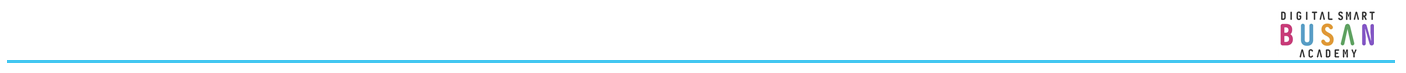

## 4-3 데이터프레임 결합
* join() 메소드는 merge() 함수를 기반으로 만들어짐 --> 기본 작동 방식이 서로 비슷
* join() 메소드는 두 데이터프레임의 행 인덱스를 기준으로 결합
  * on=keys 옵션을 설정하면 행 인덱스 대신 다른 열을 기준으로 결합하는 것이 가능

```
데이터프레임 결합: DataFrame1.join(DataFrame2, how='left')
```

* ndex_col 옵션을 적용하여, 'id' 열을 두 데이터프레임(df1, df2)의 행 인덱스로 설정
  * df1에 join() 메소드를 적용하면서 df2 를 인자로 전달하면 왼쪽에 위치한 df1의 행 인덱스를 기준으로 결합하는 how='left' 옵션이 기본 적용



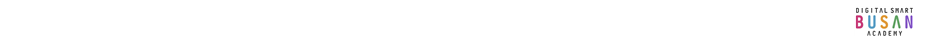

In [ ]:
# <예제 6-13> 데이터프레임 합치기(join)
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd

# IPyhton 디스플레이 설정 변경
pd.set_option('display.max_columns', 10)                  # 출력할 최대 열의 개수
pd.set_option('display.max_colwidth', 20)                 # 출력할 열의 너비
pd.set_option('display.unicode.east_asian_width', True)   # 유니코드 사용 너비 조정

# 주식 데이터를 가져와서 데이터프레임 만들기
df1 = pd.read_excel('./stock price.xlsx', index_col='id', engine= 'openpyxl')
df2 = pd.read_excel('./stock valuation.xlsx', index_col='id', engine= 'openpyxl')

# 데이터프레임 결합(join)
df3 = df1.join(df2)
print(df3)

          stock_name          value   price          name           eps  \
id                                                                        
128940      한미약품   59385.666667  421000           NaN           NaN   
130960        CJ E&M   58540.666667   98900        CJ E&M   6301.333333   
138250    엔에스쇼핑   14558.666667   13200           NaN           NaN   
139480        이마트  239230.833333  254500        이마트  18268.166667   
142280  녹십자엠에스     468.833333   10200           NaN           NaN   
145990        삼양사   82750.000000   82000        삼양사   5741.000000   
185750        종근당   40293.666667  100500        종근당   3990.333333   
192400    쿠쿠홀딩스  179204.666667  177500           NaN           NaN   
199800          툴젠   -2514.333333  115400           NaN           NaN   
204210  모두투어리츠    3093.333333    3475  모두투어리츠     85.166667   

             bps        per       pbr  
id                                     
128940       NaN        NaN       NaN  
130960   54068.0  15.695091  1.

* how='inner' 옵션을 적용해서 두 데이터프레임에 공통으로 존재하는 행 인덱스를 기준으로 추출
* 'id' 열을 기준으로 df1과 df2에 공통으로 속하는 종목은 5개

In [ ]:
# 데이터프레임 결합(join) - 교집합
df4 = df1.join(df2, how='inner')
print(df4)

          stock_name          value   price          name           eps  \
id                                                                        
130960        CJ E&M   58540.666667   98900        CJ E&M   6301.333333   
139480        이마트  239230.833333  254500        이마트  18268.166667   
145990        삼양사   82750.000000   82000        삼양사   5741.000000   
185750        종근당   40293.666667  100500        종근당   3990.333333   
204210  모두투어리츠    3093.333333    3475  모두투어리츠     85.166667   

           bps        per       pbr  
id                                   
130960   54068  15.695091  1.829178  
139480  295780  13.931338  0.860437  
145990  108090  14.283226  0.758627  
185750   40684  25.185866  2.470259  
204210    5335  40.802348  0.651359  


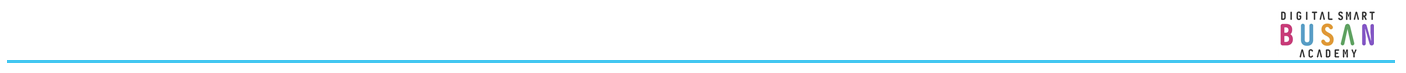

# 5. 그룹 연산
* 그룹 연산은 데이터를 집계, 변환, 필터링하는데 효율적
* 1단계) 분할(split): 데이터를 특정 조건에 의해 분할(판다스 groupby() 메소드 사용)
* 2단계) 적용(apply): 데이터를 집계, 변환, 필터링하는데 필요한 메소드 적용
* 3단계) 결합(combine): 2단계의 처리 결과를 하나로 결합

## 5-1 그룹 객체 만들기(분할 단계)

### 1. 1개 열을 기준으로 그룹화
* groupby() 메소드는 데이터프레임의 특정 열을 기준으로 데이터프레임을 분할하여 그룹 객체를 반환

```
그룹 연산(분할): DataFrame 객체.groupby(기준이 되는 열)
```

In [ ]:
# <예제 6-14> 그룹 연산-분할
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import seaborn as sns

# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

print('승객 수:', len(df))
print(df.head())
print('\n')

# class 열을 기준으로 분할
grouped = df.groupby(['class'])
print(grouped)

승객 수: 891
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
1  38.0  female  First  71.2833         1
2  26.0  female  Third   7.9250         1
3  35.0  female  First  53.1000         1
4  35.0    male  Third   8.0500         0




* 'class' 열에는 'First', 'Second', 'Third' 라는 3개의 값
  * 'First' 클래스에 216명, 'Second' 클래스에 184명, 'Third' 클래스에 491명의 승객 데이터

In [ ]:
# 그룹 객체를 iteration으로 출력: head() 메소드로 첫 5행만을 출력
for key, group in grouped:
    print('* key :', key)
    print('* number :', len(group))
    print(group.head())
    print('\n')

* key : First
* number : 216
     age     sex  class     fare  survived
1   38.0  female  First  71.2833         1
3   35.0  female  First  53.1000         1
6   54.0    male  First  51.8625         0
11  58.0  female  First  26.5500         1
23  28.0    male  First  35.5000         1


* key : Second
* number : 184
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
17   NaN    male  Second  13.0000         1
20  35.0    male  Second  26.0000         0
21  34.0    male  Second  13.0000         1


* key : Third
* number : 491
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
2  26.0  female  Third   7.9250         1
4  35.0    male  Third   8.0500         0
5   NaN    male  Third   8.4583         0
7   2.0    male  Third  21.0750         0




<ipython-input-44-f880cb2d7e5b>:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, group in grouped:


* 생성한 그룹 객체(grouped)에 연산 메소드를 적용할 수 있음
  * grouped 객체에 들어 있는 3개 그룹에 대하여 그룹별 평균값을 구하기 위해 mean() 메소드를 적용

In [ ]:
# 연산 메소드 적용
average = grouped.mean()
print(average)

              age       fare  survived
class                                 
First   38.233441  84.154687  0.629630
Second  29.877630  20.662183  0.472826
Third   25.140620  13.675550  0.242363


<ipython-input-45-8a47a4dbcbce>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average = grouped.mean()


* 그룹 객체에 get_group() 메소드를 적용하면 특정 그룹만을 선택할 수 있음

In [ ]:
# 개별 그룹 선택하기
group3 = grouped.get_group('Third')
print(group3.head())

    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
2  26.0  female  Third   7.9250         1
4  35.0    male  Third   8.0500         0
5   NaN    male  Third   8.4583         0
7   2.0    male  Third  21.0750         0


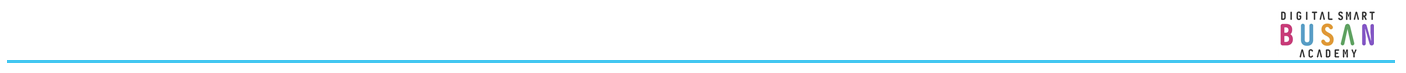


### 2. 여러 열을 기준으로 그룹화

```
그룹 연산(분할): DataFrame 객체.groupby(기준이 되는 열의 리스트)
```

* groupby() 메소드에 두 열('class', 'sex')을 인자로 전달하면 두 열이 갖는 원소 값들로 만들 수 있는 모든 조합으로 키를 생성
* 가능한 조합은 ('class', 'sex') 형식의 투플로 지정 --> 모두 6개 그룹
  * 'class' 열에는 'First', 'Second', 'Third' 라는 3개의 값
  * 'sex' 열에는 'male', ;female' 라는 2개의 값

In [ ]:
# class 열, sex 열을 기준으로 분할
grouped_two = df.groupby(['class', 'sex'])

# grouped_two 그룹 객체를 iteration으로 출력
for key, group in grouped_two:
    print('* key :', key)
    print('* number :', len(group))
    print(group.head())
    print('\n')

* key : ('First', 'female')
* number : 94
     age     sex  class      fare  survived
1   38.0  female  First   71.2833         1
3   35.0  female  First   53.1000         1
11  58.0  female  First   26.5500         1
31   NaN  female  First  146.5208         1
52  49.0  female  First   76.7292         1


* key : ('First', 'male')
* number : 122
     age   sex  class      fare  survived
6   54.0  male  First   51.8625         0
23  28.0  male  First   35.5000         1
27  19.0  male  First  263.0000         0
30  40.0  male  First   27.7208         0
34  28.0  male  First   82.1708         0


* key : ('Second', 'female')
* number : 76
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
41  27.0  female  Second  21.0000         0
43   3.0  female  Second  41.5792         1
53  29.0  female  Second  26.0000         1


* key : ('Second', 'male')
* number : 108
     age   sex   class  fare  survived
17   Na

* grouped_two 객체의 각 그룹에 mean() 메소드를 적용
  * 키가 되는 2개의 열('class', 'sex')의 값으로부터 2중 멀티 인덱스가 지정
* 실행 결과
  * 여성의 생존율이 남성에 비해 월등히 높다.
  * 3등석 여성 승객의 생존율은 50% 불과
  * 1~2등석 여성 승객의 90% 대

In [ ]:
# grouped_two 그룹 객체에 연산 메소드 적용
average_two = grouped_two.mean()
print(average_two)
print('\n')
print(type(average_two))

                     age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447


<class 'pandas.core.frame.DataFrame'>


* get_group() 메소드 활용 멀티 인덱스를 이용하여 특징 그룹만을 골라서 추출하는 방법 --> 인자로 전달하는 키는 투플로 입력

In [ ]:
# grouped_two 그룹 객체에서 개별 그룹 선택하기
group3f = grouped_two.get_group(('Third','female'))
print(group3f.head())

     age     sex  class     fare  survived
2   26.0  female  Third   7.9250         1
8   27.0  female  Third  11.1333         1
10   4.0  female  Third  16.7000         1
14  14.0  female  Third   7.8542         0
18  31.0  female  Third  18.0000         0


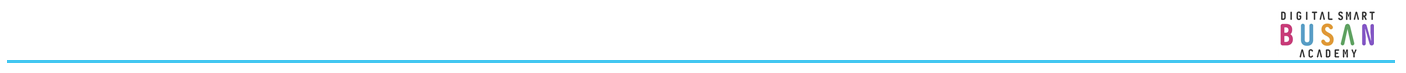

## 5-2 그룹 연산 메소드(적용-결합 단계)

### 1. 데이터 집계
* 집계 기능을 내장하고 있는 판다스 기본 함수에는 mean(), max(), min(), sum(), count(), size(), var(), std(), describe(), info(), first(), last() 등

```
표준편차 데이터 집계(내장 함수): group 객체.std()
```

* 각 그룹에 대하여 각 열의 표준편차를 계산하고, 각 그룹을 행 인덱스로 갖는 데이터프레임을 반환
* 요금('fare') 열을 보면 1등석 "First" 클래스의 요금의 표준편차가 2~3 등석보다 훨씬 크다.

In [ ]:
# <예제 6-15> 데이터 집계
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import seaborn as sns

# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

# class 열을 기준으로 분할
grouped = df.groupby(['class'])

# 각 그룹에 대한 모든 열의 표준편차를 집계하여 데이터프레임으로 반환
std_all = grouped.std()
print(std_all)
print('\n')
print(type(std_all))
print('\n')

# 각 그룹에 대한 fare 열의 표준편차를 집계하여 시리즈로 반환
std_fare = grouped.fare.std()
print(std_fare)
print('\n')
print(type(std_fare))

              age       fare  survived
class                                 
First   14.802856  78.380373  0.484026
Second  14.001077  13.417399  0.500623
Third   12.495398  11.778142  0.428949


<class 'pandas.core.frame.DataFrame'>


class
First     78.380373
Second    13.417399
Third     11.778142
Name: fare, dtype: float64


<class 'pandas.core.series.Series'>


<ipython-input-50-aef367a48065>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std_all = grouped.std()


* 집계 연산을 처리하는 사용자 정의 함수를 그룹 객체에 적용하려면 agg() 메소드를 사용

```
agg() 메소드 데이터 집계: group 객체.agg(매핑함수)
```



In [ ]:
# 그룹 객체에 agg() 메소드 적용 - 사용자 정의 함수를 인수로 전달
def min_max(x):    # 최대값 - 최소값
    return x.max() - x.min()

# 각 그룹의 최대값과 최소값의 차이를 계산하여 그룹별로 집계
agg_minmax = grouped.agg(min_max)
print(agg_minmax.head())

          age      fare  survived
class                            
First   79.08  512.3292         1
Second  69.33   73.5000         1
Third   73.58   69.5500         1


<ipython-input-51-edf1e077a5ac>:6: FutureWarning: ['sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  agg_minmax = grouped.agg(min_max)


* 동시에 여러 개의 함수를 사용하녀 각 그룹별 데이터에 대한 집계 연산을 처리할 수 있음

```
* 모든 열에 여러 함수를 매핑: group 객체.agg([함수1, 함수2, 함수3, ...])
* 각 열마다 다른 함수를 매핑: group 객체.agg({'열1':함수1, '열2':함수2, ...})
```



* agg_all 변수는 grouped 객에의 각 열에 2개의 함수('min', 'max')를 일괄 적용하여 그룹별로 집계한 결과
* agg_all 변수는 'fare' 열에는 2개 함수('min', 'max')를 적용하고, 'age'열에는 다른 종류의 함수('mean')을 적용하여 집게

In [ ]:
# 여러 함수를 각 열에 동일하게 적용하여 집계
agg_all = grouped.agg(['min', 'max'])
print(agg_all.head())
print('\n')

# 각 열마다 다른 함수를 적용하여 집계
agg_sep = grouped.agg({'fare':['min', 'max'], 'age':'mean'})
print(agg_sep.head())

         age           sex       fare           survived    
         min   max     min   max  min       max      min max
class                                                       
First   0.92  80.0  female  male  0.0  512.3292        0   1
Second  0.67  70.0  female  male  0.0   73.5000        0   1
Third   0.42  74.0  female  male  0.0   69.5500        0   1


       fare                  age
        min       max       mean
class                           
First   0.0  512.3292  38.233441
Second  0.0   73.5000  29.877630
Third   0.0   69.5500  25.140620


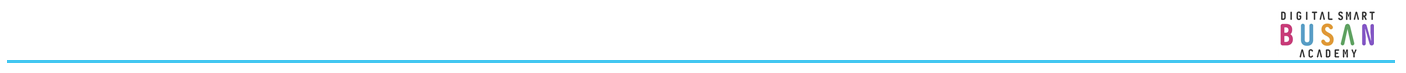

### 2. 그룹 연산 데이터 변환
* transform() 메소드는 그룹별로 구분하여 각 원소에 함수를 적용하지만 그룹별 집계 대신 각 원소의 본래 행 인덱스와 열 이름을 기준으로 연산 결과를 반환

```
데이터 변환 연산: group 객체.transform(매핑함수)
```

* 'age' 열에 포함된 개별 데이터의 z-score를 구하는 과정

In [ ]:
# <예제 6-16> 그룹 연산 데이터 변환
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import seaborn as sns

# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

# class 열을 기준으로 분할
grouped = df.groupby(['class'])

# 그룹별 age 열의 평균 집계 연산
age_mean = grouped.age.mean()
print(age_mean)
print('\n')

# 그룹별 age 열의 표준편차 집계 연산
age_std = grouped.age.std()
print(age_std)
print('\n')

# 그룹 객체의 age 열을 iteration으로 z-score를 계산하여 출력
for key, group in grouped.age:
    group_zscore = (group - age_mean.loc[key]) / age_std.loc[key]
    print('* origin :', key)
    print(group_zscore.head(3))  # 각 그룹의 첫 3개의 행을 출력
    print('\n')

class
First     38.233441
Second    29.877630
Third     25.140620
Name: age, dtype: float64


class
First     14.802856
Second    14.001077
Third     12.495398
Name: age, dtype: float64


* origin : First
1   -0.015770
3   -0.218434
6    1.065103
Name: age, dtype: float64


* origin : Second
9    -1.134029
15    1.794317
17         NaN
Name: age, dtype: float64


* origin : Third
0   -0.251342
2    0.068776
4    0.789041
Name: age, dtype: float64




* transform() 메소드를 사용하여 'age' 열의 데이터를 z-score로 직접 변환





In [ ]:
# z-score를 계산하는 사용자 함수 정의
def z_score(x):
    return (x - x.mean()) / x.std()

# transform() 메소드를 이용하여 age 열의 데이터를 z-score로 변환
age_zscore = grouped.age.transform(z_score)
print(age_zscore.loc[[1, 9, 0]])     # 1, 2, 3 그룹의 첫 데이터 확인 (변환 결과)
print('\n')
print(len(age_zscore))              # transform 메소드 반환 값의 길이
print('\n')
print(age_zscore.loc[0:9])          # transform 메소드 반환 값 출력 (첫 10개)
print('\n')
print(type(age_zscore))             # transform 메소드 반환 객체의 자료형

1   -0.015770
9   -1.134029
0   -0.251342
Name: age, dtype: float64


891


0   -0.251342
1   -0.015770
2    0.068776
3   -0.218434
4    0.789041
5         NaN
6    1.065103
7   -1.851931
8    0.148805
9   -1.134029
Name: age, dtype: float64


<class 'pandas.core.series.Series'>


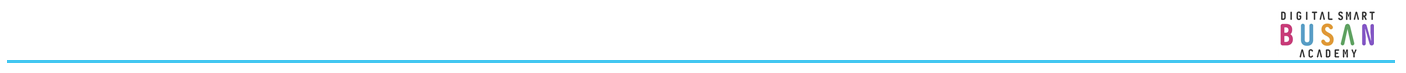

### 3. 그룹 객체 필터링
* 그룹 객체에 filter() 메소드를 적용할 때 조건식을 가진 함수를 전달하면 조건이 참인 그룹만을 남김

```
그룹 객체 필터링: group 객체.filter(조건식 함수)
```

* 데이터 개수가 200개 이상인 그룹만을 필터링
  * 'class' 열을 기준으로 구분된 3개의 그룹 중에서 조건을 충족하는 'First'와 'Third'인 그룹의 데이터만 추출

In [ ]:
# <예제 6-17> 그룹 객체 필터링
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import seaborn as sns

# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

# class 열을 기준으로 분할
grouped = df.groupby(['class'])

# 데이터 개수가 200개 이상인 그룹만을 필터링하여 데이터프레임으로 반환
grouped_filter = grouped.filter(lambda x: len(x) >= 200)
print(grouped_filter.head())
print('\n')
print(type(grouped_filter))

    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
1  38.0  female  First  71.2833         1
2  26.0  female  Third   7.9250         1
3  35.0  female  First  53.1000         1
4  35.0    male  Third   8.0500         0


<class 'pandas.core.frame.DataFrame'>


*'age' 열의 평균이 30보다 작은 그룹만을 따로 선택
  * 평균나이가 30세가 안되는 그룹은 'class' 값이 'second'와 'Third'인 2등석과 3등석 승객들

In [ ]:
# age 열의 평균이 30보다 작은 그룹만을 필터링하여 데이터프레임으로 반환
age_filter = grouped.filter(lambda x: x.age.mean() < 30)
print(age_filter.tail())
print('\n')
print(type(age_filter))

      age     sex   class    fare  survived
884  25.0    male   Third   7.050         0
885  39.0  female   Third  29.125         0
886  27.0    male  Second  13.000         0
888   NaN  female   Third  23.450         0
890  32.0    male   Third   7.750         0


<class 'pandas.core.frame.DataFrame'>


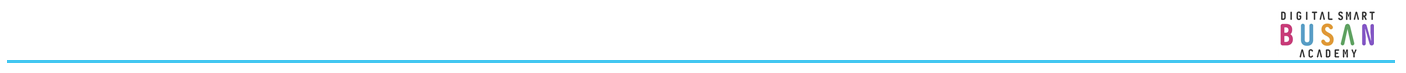

### 4. 그룹 객체에 함수 매핑
* apply() 메소드는 판다스 객체의 개별 원소를 특정 함수에 일대일로 매핑

```
범용 메소드:group 객에.apply(매핑 함수)
```

* 'class' 열을 기준으로 구분한3개의 그룹에 요약 통계 정보를 나타내는 describ() 메소드를 적용
  * 각 그룹별 데이터의 개수, 평균, 표준편차, 최솟값, 최댓값 등을 확인

In [ ]:
# <예제 6-18> 그룹 객체에 함수 매핑
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import seaborn as sns

# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

# class 열을 기준으로 분할
grouped = df.groupby(['class'])

# 집계 : 각 그룹별 요약 통계정보를 집계
agg_grouped = grouped.apply(lambda x: x.describe())
print(agg_grouped)

                     age        fare    survived
class                                           
First  count  186.000000  216.000000  216.000000
       mean    38.233441   84.154687    0.629630
       std     14.802856   78.380373    0.484026
       min      0.920000    0.000000    0.000000
       25%     27.000000   30.923950    0.000000
       50%     37.000000   60.287500    1.000000
       75%     49.000000   93.500000    1.000000
       max     80.000000  512.329200    1.000000
Second count  173.000000  184.000000  184.000000
       mean    29.877630   20.662183    0.472826
       std     14.001077   13.417399    0.500623
       min      0.670000    0.000000    0.000000
       25%     23.000000   13.000000    0.000000
       50%     29.000000   14.250000    0.000000
       75%     36.000000   26.000000    1.000000
       max     70.000000   73.500000    1.000000
Third  count  355.000000  491.000000  491.000000
       mean    25.140620   13.675550    0.242363
       std     12.49

* z-score를 계산하는 사용자 함수를 사용하여 'age' 열의 데이터를 z-score로 반환

In [ ]:
# 집계 : 각 그룹별 요약 통계정보를 집계
agg_grouped = grouped.apply(lambda x: x.describe())
print(agg_grouped)
print('\n')

# z-score를 계산하는 사용자 함수 정의
def z_score(x):
    return (x - x.mean()) / x.std()

age_zscore = grouped.age.apply(z_score)   #기본값 axis=0
print(age_zscore.head())

                     age        fare    survived
class                                           
First  count  186.000000  216.000000  216.000000
       mean    38.233441   84.154687    0.629630
       std     14.802856   78.380373    0.484026
       min      0.920000    0.000000    0.000000
       25%     27.000000   30.923950    0.000000
       50%     37.000000   60.287500    1.000000
       75%     49.000000   93.500000    1.000000
       max     80.000000  512.329200    1.000000
Second count  173.000000  184.000000  184.000000
       mean    29.877630   20.662183    0.472826
       std     14.001077   13.417399    0.500623
       min      0.670000    0.000000    0.000000
       25%     23.000000   13.000000    0.000000
       50%     29.000000   14.250000    0.000000
       75%     36.000000   26.000000    1.000000
       max     70.000000   73.500000    1.000000
Third  count  355.000000  491.000000  491.000000
       mean    25.140620   13.675550    0.242363
       std     12.49

<ipython-input-57-bc59ac46e890>:10: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  age_zscore = grouped.age.apply(z_score)   #기본값 axis=0


* 'age' 열의 평균값이 30보다 작은 그룹을 판별
  * 조건이 참인 그룹을 'class' 값이 'Second'와 'Thrid'인 그룹

In [ ]:
# 필터링 : age 열의 데이터 평균이 30보다 작은 그룹만을 필터링하여 출력
age_filter = grouped.apply(lambda x: x.age.mean() < 30)
print(age_filter)
print('\n')
for x in age_filter.index:
    if age_filter[x]==True:
        age_filter_df = grouped.get_group(x)
        print(age_filter_df.head())
        print('\n')

class
First     False
Second     True
Third      True
dtype: bool


     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
17   NaN    male  Second  13.0000         1
20  35.0    male  Second  26.0000         0
21  34.0    male  Second  13.0000         1


    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
2  26.0  female  Third   7.9250         1
4  35.0    male  Third   8.0500         0
5   NaN    male  Third   8.4583         0
7   2.0    male  Third  21.0750         0




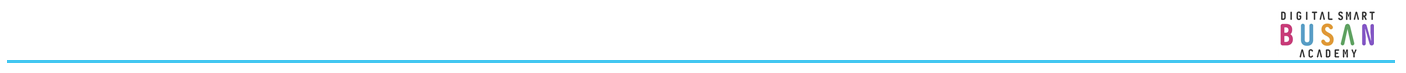

# 6. 멀티 인덱스

* 판다스는 행 인덱스를 여러 레벨로 구현할 수 있도록 멀티 인덱스(MultiIndex) 클래스를 지원
  * 'class' 열과 'sex' 열에 들어 있는 객실 등급과 남녀 성별을 기준으로 그룹화 --> 그룹 객체에 mean() 메소드를 적용 반환
  * 반환하는 객체는 멀티 인덱스를 가진 데이터프레임 gdf 변수에 저장

In [ ]:
# <예제 6-19> 멀티 인덱스
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import seaborn as sns

# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

# class 열, sex 열을 기준으로 분할
grouped = df.groupby(['class', 'sex'])

# 그룹 객체에 연산 메서드 적용
gdf = grouped.mean()
print(gdf)
print('\n')
print(type(gdf))

                     age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447


<class 'pandas.core.frame.DataFrame'>


* 멀티 인덱스에서 하나의 인덱스만 사용하는 방법
  * loc 인덱서를 이용하면 'class' 인덱스에서 'First'라는 값을 가진 행을 선택

In [ ]:
# class 값이 First인 행을 선택하여 출력
print(gdf.loc['First'])

              age        fare  survived
sex                                    
female  34.611765  106.125798  0.968085
male    41.281386   67.226127  0.368852


* 멀티 인덱스에서 두 개의 인덱스를 사용하는 방법
    * loc 인덱서를 이용하고 ('First', 'female')와 같이 투플 형태로 각 인덱스에서 찾는 값을 전달

In [ ]:
# class 값이 First이고, sex 값이 female인 행을 선택하여 출력
print(gdf.loc[('First', 'female')])

age          34.611765
fare        106.125798
survived      0.968085
Name: (First, female), dtype: float64


* loc 인덱서 대신 xs 인덱서를 사용
  * 'sex' 인덱스에서 'male' 값을 갖는 행을 추출

In [ ]:
# sex 값이 male인 행을 선택하여 출력
print(gdf.xs('male', level='sex'))

              age       fare  survived
class                                 
First   41.281386  67.226127  0.368852
Second  30.740707  19.741782  0.157407
Third   26.507589  12.661633  0.135447


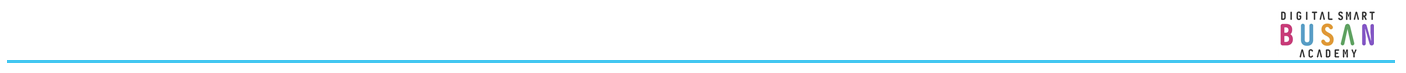

# 7, 피벗

* 판다스 pivot_table() 함수는 엑셀에서 사용하는피빗테이블과 비슷한 기능을 처리
  * 피빗테이블을 구성하는 4가지 요소(행 인덱스, 열 인덱스, 데이터 값, 데이터 집계 함수)에 적용할 데이터프레임의 열을 각각 지정하여 함수의 인자로 전달

In [ ]:
# <예제 6-20> 피벗테이블
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import seaborn as sns

# IPyhton 디스플레이 설정 변경
pd.set_option('display.max_columns', 10)    # 출력할 최대 열의 개수
pd.set_option('display.max_colwidth', 20)    # 출력할 열의 너비

# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]
print(df.head())
print('\n')

# 행, 열, 값, 집계에 사용할 열을 1개씩 지정 - 평균 집계
pdf1 = pd.pivot_table(df,              # 피벗할 데이터프레임
                     index='class',    # 행 위치에 들어갈 열
                     columns='sex',    # 열 위치에 들어갈 열
                     values='age',     # 데이터로 사용할 열
                     aggfunc='mean')   # 데이터 집계 함수

print(pdf1.head())

    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
1  38.0  female  First  71.2833         1
2  26.0  female  Third   7.9250         1
3  35.0  female  First  53.1000         1
4  35.0    male  Third   8.0500         0


sex        female       male
class                       
First   34.611765  41.281386
Second  28.722973  30.740707
Third   21.750000  26.507589


* 행 인덱스로는 'class' 열의 3가지 값이 표시, 열 위치에는 'sex' 열의 2가지 값이 사용. 'age' 열의 승객 나이 데이터의 평균값을 계산하여 출력

* 'survived' 열을 피빗의 데이터 값으로 사용하고, 데이터를 집계하는 함수를 2개('mean', 'sum') 사용

In [ ]:
# 값에 적용하는 집계 함수를 2개 이상 지정 가능 - 생존율, 생존자 수 집계
pdf2 = pd.pivot_table(df,                       # 피벗할 데이터프레임
                     index='class',             # 행 위치에 들어갈 열
                     columns='sex',             # 열 위치에 들어갈 열
                     values='survived',         # 데이터로 사용할 열
                     aggfunc=['mean', 'sum'])   # 데이터 집계 함수

print(pdf2.head())

            mean              sum     
sex       female      male female male
class                                 
First   0.968085  0.368852     91   45
Second  0.921053  0.157407     70   17
Third   0.500000  0.135447     72   47


In [ ]:
# 행, 열, 값에 사용할 열을 2개 이상 지정 가능 - 평균 나이, 최대 요금 집계
pdf3 = pd.pivot_table(df,                       # 피벗할 데이터프레임
                     index=['class', 'sex'],    # 행 위치에 들어갈 열
                     columns='survived',        # 열 위치에 들어갈 열
                     values=['age', 'fare'],    # 데이터로 사용할 열
                     aggfunc=['mean', 'max'])   # 데이터 집계 함수

# IPython Console 디스플레이 옵션 설정
pd.set_option('display.max_columns', 10)        # 출력할 열의 개수 한도
print(pdf3.head())
print('\n')

# 행, 열 구조 살펴보기
print(pdf3.index)
print(pdf3.columns)

                    mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
class  sex                                                                
First  female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
Second female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
Third  female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   

                                 
                 fare            
survived            0         1  
class  sex                       
First  female  151.55  512.3292  
       male    263.00  512.3292  
Second female   26.00   65.0000  
       male     73.50   39.0000  
Third  female   69.55   31.3875  


MultiIndex([( 'F

* xs 인덱서는 기본값으로 행 인덱스에 접근하고, 축 값응 axis=0으로 자동 설정
* 행 인덱스가'First'인 1등석 승객의 데이터를 추출

In [ ]:
# xs 인덱서 사용 - 행 선택(default: axis=0)
print(pdf3.xs('First'))              # 행 인덱스가 First인 행을 선택

               mean                                      max                \
                age                   fare               age          fare   
survived          0          1           0           1     0     1       0   
sex                                                                          
female    25.666667  34.939024  110.604167  105.978159  50.0  63.0  151.55   
male      44.581967  36.248000   62.894910   74.637320  71.0  80.0  263.00   

                    
                    
survived         1  
sex                 
female    512.3292  
male      512.3292  


* 행 인덱스 레벨 0에서 'First'를 가져오고, 행 인덱스 레벨 1에서 'female'을 가져옴
  * 두 개의 인덱스 값을 투플로 전달하면 1등석 승객 중에서 여성의 데이터만을 선택

In [ ]:
print(pdf3.xs(('First', 'female')))   # 행 인덱스가 ('First', 'female')인 행을 선택

            survived
mean  age   0            25.666667
            1            34.939024
      fare  0           110.604167
            1           105.978159
max   age   0            50.000000
            1            63.000000
      fare  0           151.550000
            1           512.329200
Name: (First, female), dtype: float64


* 행 인덱스 레벨을 직접 지정하는 방법
  * 'sex' 레벨에서 남성 승객을 나타내는 'male'에 해당하는 데이터만 추출

In [ ]:
print(pdf3.xs('male', level='sex'))  # 행 인덱스의 sex 레벨이 male인 행을 선택

               mean                                    max                \
                age                  fare              age          fare   
survived          0          1          0          1     0     1       0   
class                                                                      
First     44.581967  36.248000  62.894910  74.637320  71.0  80.0  263.00   
Second    33.369048  16.022000  19.488965  21.095100  70.0  62.0   73.50   
Third     27.255814  22.274211  12.204469  15.579696  74.0  45.0   69.55   

                    
                    
survived         1  
class               
First     512.3292  
Second     39.0000  
Third      56.4958  


* 마지막으로 행 인덱스 레벨 0에서 'Second'를 가져오고, 행 인덱스 레벨 'sex'에서 'male'을 가져온다.

In [ ]:
print(pdf3.xs(('Second', 'male'), level=[0, 'sex']))  # Second, male인 행을 선택

                  mean                               max                  
                   age               fare            age        fare      
survived             0       1          0        1     0     1     0     1
class  sex                                                                
Second male  33.369048  16.022  19.488965  21.0951  70.0  62.0  73.5  39.0


* xs 인덱서를 이용하여 - 열 인덱스 선택(axis=1 설정)
  * 데이터프레임 pdf3의 'mean' 열을 선택하여 평균값 데이터를 추출

In [ ]:
# xs 인덱서 사용 - 열 선택(axis=1 설정)
print(pdf3.xs('mean', axis=1))        # 열 인덱스가 mean인 데이터를 선택

                     age                   fare            
survived               0          1           0           1
class  sex                                                 
First  female  25.666667  34.939024  110.604167  105.978159
       male    44.581967  36.248000   62.894910   74.637320
Second female  36.000000  28.080882   18.250000   22.288989
       male    33.369048  16.022000   19.488965   21.095100
Third  female  23.818182  19.329787   19.773093   12.464526
       male    27.255814  22.274211   12.204469   15.579696


* 열 인덱스 레벨 0에서 평균값을 나타내는 'mean'을 지정하고, 열 인덱스 페벨 1에서 나이를 나타내느 'age'를 지정

In [ ]:
print(pdf3.xs(('mean', 'age'), axis=1))   # 열 인덱스가 ('mean', 'age')인 데이터 선택

survived               0          1
class  sex                         
First  female  25.666667  34.939024
       male    44.581967  36.248000
Second female  36.000000  28.080882
       male    33.369048  16.022000
Third  female  23.818182  19.329787
       male    27.255814  22.274211


* 열 인덱스 레벨을 직접 지정
* survived 레벨의 값이 1(생존자 데이터)에 해당하는 데이터만을 추출

In [ ]:
print(pdf3.xs(1, level='survived', axis=1))  # survived 레벨이 1인 데이터 선택

                    mean               max          
                     age        fare   age      fare
class  sex                                          
First  female  34.939024  105.978159  63.0  512.3292
       male    36.248000   74.637320  80.0  512.3292
Second female  28.080882   22.288989  55.0   65.0000
       male    16.022000   21.095100  62.0   39.0000
Third  female  19.329787   12.464526  63.0   31.3875
       male    22.274211   15.579696  45.0   56.4958


* 열 인덱스 레벨 0에서 최댓값을 나타내는 'max', 레벨 1에서 최댓값을 나타내는 'fare'
  * 'survived' 열을 나타내는 레벨 2에서 구조받지 못한 승객을 나타내는 0을 가져옴
  * 반환되는 데이터는 구조받지 못한 승객들 객실 요금의 최댓값

In [ ]:
print(pdf3.xs(('max', 'fare', 0),
              level=[0, 1, 2], axis=1))  # max, fare, survived=0인 데이터 선택

                  max
                 fare
survived            0
class  sex           
First  female  151.55
       male    263.00
Second female   26.00
       male     73.50
Third  female   69.55
       male     69.55


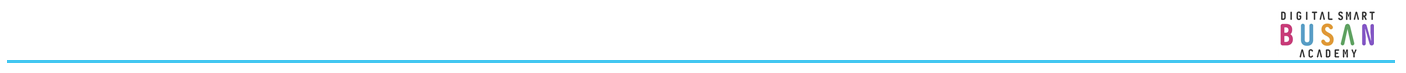